# Derivadas numéricas: introducción
**Objetivo general**
- Entender la utilidad de una derivada y su aproximación numérica.

In [174]:
import numpy as np
import matplotlib.pyplot as plt
import macti.visual as mvis

In [175]:
from macti.evaluation import Quizz, FileAnswer
quizz = Quizz("1", "notebooks", "DerivadasNumericas", "local")
#file_answer = FileAnswer("notebooks", "DerivadasNumericas", "local")

<a name='1'></a>
## Masa y densidad

Un experimentado maestro albañil, necesita cortar una varilla de metal en varias secciones para construir una escalera. Realiza las marcas de la varilla y se ven como en la siguiente figura:

<img src="../utils/fig/secciones.png">


Como se observa, el tamaño de cada sección de la varilla es de 0.5 m. Por razones de la estructura, se necesita conocer el peso de cada sección de la varilla para evitar que la escalera se derrumbe. El maestro albañil realizó los cortes y pesó cada sección, obteniendo los siguientes resultados:

| Sección | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |
|---|---|---|---|---|---|---|---|---|
| Masa [Kg] | 0.595 | 0.806 | 0.369 | 1.078 | 1.704 | 1.475 | 2.263 |  3.282 |


---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 1. Definir los arreglos de `numpy` para las secciones de la varilla.</font>**

<font color="DarkBlue">Construya dos arreglos de numpy como sigue: 
    
a. `longitud` : para almacenar las marcas hechas en la varillas, comenzando en $0$ y terminando en $4.0$.
    
b.  `masas_sec`: para almacenar el valor de la masa de cada sección. </font>

---

In [150]:
### BEGIN SOLUTION
# Marcas sobre la varilla de cada sección
longitud = np.linspace(0,4.0,9)
#np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5,  4.0]) 

# Peso de cada sección [kg]
masas_sec = np.array([0.595, 0.806, 0.369, 1.078, 1.704, 1.475, 2.263,  3.282])

#file_answer.write("1a", longitud, 'Checa el arreglo secciones')
#file_answer.write("1b", masas_sec, 'Checa el arreglo masas_sec')
### END SOLUTION

# longitud = np...
# masas_sec = np...

In [151]:
quizz.eval_numeric('1a',longitud)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


In [152]:
quizz.eval_numeric('1b', masas_sec)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


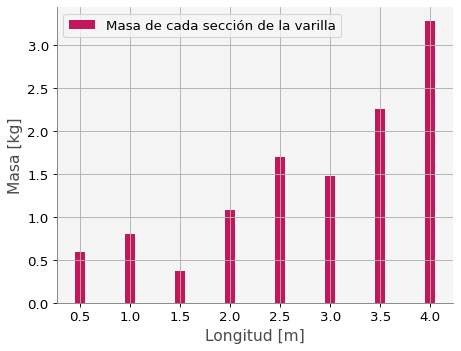

In [153]:
# Gráfica de la masa para cada sección en forma de barras verticales.
plt.bar(longitud[1:], masas_sec, 
        width=0.1, color='C3', 
        label='Masa de cada sección de la varilla')

plt.xlabel('Longitud [m]')
plt.ylabel('Masa [kg]')
plt.grid()
plt.legend()
plt.show()


---
<a name='ej-2'></a>
### **<font color="DodgerBlue">Ejercicio 2. Calcular la masa total de la varilla.</font>**

<font color="DarkBlue">Escriba un código que genere el arreglo de numpy `masa` con ceros, del mismo tamaño que el arreglo `longitud
`. En la primera posición del arreglo `masa` deje el valor de cero; en la segunda posición ponga el valor de la masa de la primera sección; en la tercera posición el valor de la primera sección más el valor de la masa de la segunda sección; y así sucesivamente hasta obtener el peso total de la varilla en la última posición. Diseñe un algoritmo para realizar este proceso y escríbalo en la siguiente celda.</font>

---


In [154]:
### BEGIN SOLUTION
masa = np.zeros(len(longitud))
for i, ms in enumerate(masas_sec):
    masa[i+1] = masa[i] + ms
    
# file_answer.write("2", masa, 'Checa la construcción del arreglo masa')
### END SOLUTION
# masa = ... # arreglo para almacenar la masa de las secciones
# for ...
#     ...

In [155]:
quizz.eval_numeric('2', masa)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


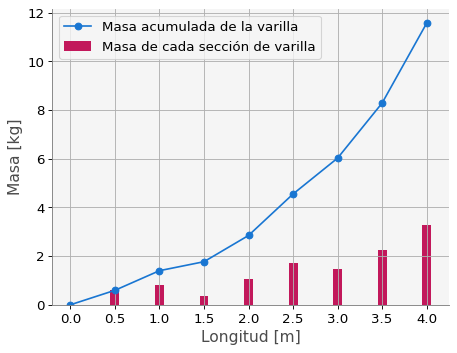

In [156]:
# Gráfica de la masa como función de la posición
plt.plot(longitud, masa, 
         'o-', label='Masa acumulada de la varilla')

# Gráfica de la masa para cada sección en forma de barras verticales.
plt.bar(longitud[1:], masas_sec, 
        width=0.1, color='C3', 
        label='Masa de cada sección de varilla')

plt.xlabel('Longitud [m]')
plt.ylabel('Masa [kg]')
plt.legend()
plt.grid()
plt.show()

Si todo se hizo correctamente, se verá que la masa no crece linealmente. Se sospecha que la densidad de la varilla no cambia homogéneamente en toda su longitud. ¿Cómo podemos determinar la densidad de la varilla en cada uno de sus puntos?

---
Suponemos que todo está en una dimensión, de tal manera que podemos definir una densidad "lineal" de la siguiente manera:

$$
\rho(x) = \frac{\text{Masa}}{\text{Longitud}} = \frac{m}{l}
$$

Recordemos que la masa es una **propiedad extensiva**: es directamente proporcional al tamaño del sistema o a la cantidad de material, mientras que la densidad es una **propiedad intensiva**: no depende del tamaño del sistema, es invariante a la escala.

Si observamos con atención, esta densidad se puede calcular para cada sección, vea la figura:

<img src="../utils/fig/secciones_mi.png">


$\rho_i = \dfrac{m_i}{l_i}$ para $i = 0,1,2, \dots$ donde $m_i$ es la masa de la sección y $l_i$ su longitud.

Si observamos con más atención, la densidad de la sección $i$ se puede obtener mediante la siguiente aproximación:

$\rho_i \approx \dfrac{m_{i} - m_{i-1}}{l_{i} - l_{i-1}} = \dfrac{m_{i} - m_{i-1}}{\delta l_{i}} $

La fórmula anterior, cuando $\delta l_{i} \to 0$, representa una derivada:

$$
\rho_i = \lim_{\delta l_{i} \to 0} \dfrac{m_{i} - m_{i-1}}{\delta l_{i}} = \dfrac{d \; m (x)}{d x} \tag{1}
$$


---
<a name='ej-3'></a>
### **<font color="DodgerBlue">Ejercicio 3. Calcular la densidad "lineal" de la varilla.</font>**

<font color="DarkBlue">En la siguiente celda, escriba la función `derivada(m, l)` para calcular la densidad de la varilla para cada sección usando la aproximación de la fórmula $(1)$, donde `m` y `l` representan la masa y la longitud de las secciones de la varilla. Esta función debe regresar un arreglo con los valores de la densidad para cada sección. Ejecuta la función almacenando el resultado en la variable `densidad`.</font>

---

In [157]:
### BEGIN SOLUTION
derivada = lambda m, l : [(m[i] - m[i-1]) / (l[i] - l[i-1]) for i in range(1,len(l))]

#def derivada(m, l):
#    return [(m[i] - m[i-1]) / (l[i] - l[i-1]) for i in range(1,len(l))]

def derivada(m, l):
    d = np.zeros(len(masas_sec))
    for i in range(1, len(l)):
        d[i-1] = (m[i] - m[i-1]) / (l[i] - l[i-1])
    return d
    
densidad = derivada(masa, longitud)

#file_answer.write("3", densidad, 'Checa la implementación de la función derivada()')
### END SOLUTION
# def derivada(m, l):
#     ...
#
# densidad = derivada(masa, longitud)

print(densidad)

[1.19  1.612 0.738 2.156 3.408 2.95  4.526 6.564]


In [158]:
quizz.eval_numeric('3',densidad)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


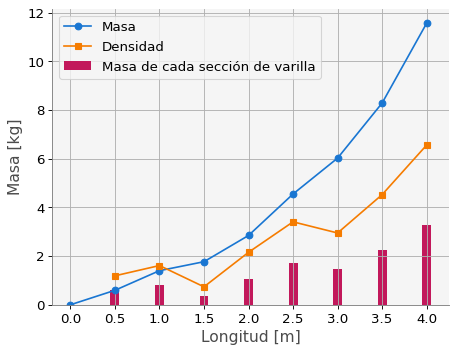

In [159]:
# Gráfica de la masa y de la densidad para cada sección
plt.plot(longitud, masa, 'o-', label='Masa')
plt.plot(longitud[1:], densidad,'s-', label='Densidad')

# Gráfica de la masa para cada sección en forma de barras verticales.
plt.bar(longitud[1:], masas_sec, 
        width=0.1, color='C3', 
        label='Masa de cada sección de varilla')

plt.xlabel('Longitud [m]')
plt.ylabel('Masa [kg]')
plt.legend()
plt.grid()
plt.show()

Después de una búsqueda sobre las especificaciones de la varilla, se encuentra que la densidad está dada por siguiente fórmula:

$$
\rho = (1000 x^2 + 5000 \sin^2(2x)) A \tag{2}
$$

donde $x$ es la posición en la varilla y $A$ es el área transversal de la misma. Al medir el diámetro de la varilla se encuentra el valor de $d = 0.02$ m , por lo tanto el radio es $r = 0.01$ m.

---
<a name='ej-4'></a>
### **<font color="DodgerBlue">Ejercicio 4. Calcular la densidad exacta.</font>**

<font color="DarkBlue">Implemente la fórmula de la densidad $(2)$ en la función `calc_densidad(x, A)` y evalue dicha fórmula con los datos del radio antes definido y puntos que están en el intervalo $[0, 4.5]$ separados por una distancia de $0.1$. Almacene el resultado en la variable ρ. Posteriormente compare gráficamente el resultado con la aproximación realizada en el ejercicio anterior.</font>

---

In [160]:
r = 0.01
A = np.pi * r ** 2

### BEGIN SOLUTION
#calc_densidad = lambda x, A: (1000 * x**2 + 5000 * np.sin(2*x)**2) * A

def calc_densidad(x, A):
    return (1000 * x**2 + 5000 * np.sin(2*x)**2) * A

# Puntos donde se evaluá la fórmula de la densidad
x = np.arange(0.0, 4.5, .1)

# Cálculo de la densidad en cada posición del arreglo x
ρ = [calc_densidad(l,A) for l in x]
    
#file_answer.write("4", ρ, 'Verifica que la fórmula (2) esté bien implementada y cada uno de los datos de entrada.')
### END SOLUTION
# def calc_densidad(x, A):
#     ...
#
# x = ...
# ρ = ...

print(ρ)

[0.0, 0.065140142984144, 0.25077236406386394, 0.5290773824209537, 0.8585968970424002, 1.1907789408649767, 1.4776431688135958, 1.6793558992965574, 1.7705189766656613, 1.7441795815382646, 1.6129279280991666, 1.406909546114531, 1.169065964621893, 0.9483551886937212, 0.7920223069253689, 0.7381405307711528, 0.8096002716097072, 1.0104952481017955, 1.3254761780264852, 1.7221740924437288, 2.156310684160917, 2.578688878846925, 2.9429599713234333, 3.212941066996997, 3.368327565325648, 3.4078988097868033, 3.349710802702375, 3.2282455594876254, 3.0889671566078496, 2.9811439535688815, 2.9500702022640968, 3.0299150805307193, 3.238328130281404, 3.5736527829144573, 4.0151878950714055, 4.526456003996436, 5.060962316838884, 5.569535216116573, 6.00808937693044, 6.344585870417729, 6.564090406147258, 6.671131128203245, 6.688983720799259, 6.65599668952679, 6.619536975529502]


In [161]:
quizz.eval_numeric('4',ρ)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


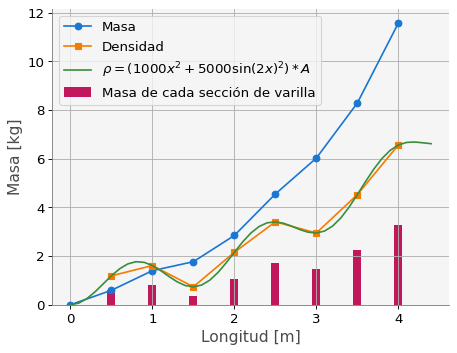

In [162]:
# Gráfica de la masa como función de las secciones
plt.plot(longitud, masa, 'o-', label='Masa')

# Gráfica de la densidad como función de las secciones
plt.plot(longitud[1:], densidad,'s-', label='Densidad')

# Gráfica de la densidad exacta
plt.plot(x, ρ, label = '$\\rho =(1000 x^2 + 5000 \sin(2x)^2 ) * A $')

# Gráfica de la masa para cada sección en forma de barras verticales.
plt.bar(longitud[1:], masas_sec, 
        width=0.1, color='C3', 
        label='Masa de cada sección de varilla')

plt.xlabel('Longitud [m]')
plt.ylabel('Masa [kg]')
plt.legend()
plt.grid()
plt.show()

Para evaluar la aproximación, se puede usar el error absoluto y el error relativo los cuales se definen como sigue.</font>

$$
\begin{eqnarray*}
Error_{absoluto} & = & ||v_e - v_a|| \\ \\
Error_{relativo} & = & \dfrac{||v_e - v_a||}{||v_e||}
\end{eqnarray*}
$$

donde $v_e$ es el valor exacto y $v_a$ es el valor aproximado.

---
<a name='ej-5'></a>
### **<font color="DodgerBlue">Ejercicio 5. Error absoluto y error relativo.</font>**

<font color="DarkBlue">Implemente las fórmulas del error absoluto y relativo en las funciones *lambda* `error_absoluto(ve, va)` y `error_relativo(ve, va)` respectivamente.</font>

- 5a. Calcular el valor de la densidad exacta con la fórmula (2) para cada sección. Almacene el resultado en la variable `densidad_e`.
- 5b. Comparar la aproximación (1) con el resultado del inciso 5a usando el error absoluto. Almacene el error en la variable `error_a`.
- 5c. Comparar la aproximación (1) con el resultado del inciso 5a usando el error relativo. Almacene el error en la variable `error_r`.

---

In [163]:
### BEGIN SOLUTION
error_absoluto = lambda ve, va: np.fabs(ve - va)
error_relativo = lambda ve, va: np.fabs(ve - va) / np.fabs(ve)

# Calculamos la densidad en cada sección con la fórmula (2)
densidad_e = calc_densidad(longitud[1:], A)

# Calculamos los errores con respecto de la aproximación

error_a = [error_absoluto(e, a) for e, a in zip(densidad_e, densidad)]
error_r = [error_relativo(e, a) for e, a in zip(densidad_e, densidad)]

#error_a = []
#error_r = []
#for e,a in zip(densidad_e, densidad):
#    error_a.append(error_absoluto(e,a))
#    error_r.append(error_relativo(e,a))
    
#file_answer.write("5a", densidad_e, '')
#file_answer.write("5b", error_a, '')
#file_answer.write("5c", error_r, '')
### END SOLUTION
# error_absoluto = lambda ...
# error_relativo = lambda ...
# densidad_e = ...
# error_a = ...
# error_r = ...


In [164]:
quizz.eval_numeric('5a', densidad_e)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


In [165]:
quizz.eval_numeric('5b', error_a)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


In [166]:
quizz.eval_numeric('5c', error_r)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


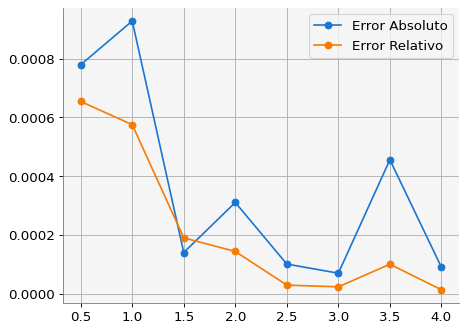

In [167]:
# Gráficas del error absoluto y del error relativo
plt.plot(longitud[1:], error_a, 'o-', label='Error Absoluto')
plt.plot(longitud[1:], error_r, 'o-', label='Error Relativo')
plt.legend()
plt.grid()
plt.show()

Si tenemos la fórmula de la densidad, ecuación $(2)$, podemos encontrar la fórmula para la masa haciendo la integral de la densidad.

$$
m(x) = \int \rho dx = \int (1000 x^2 + 5000 \sin^2(2x)) A \; dx = A \int f(x) \; dx = ¿? \tag{3}
$$


---
<a name='ej-6'></a>
### **<font color="DodgerBlue">Ejercicio 6. Fórmula exacta para la masa.</font>**

* 6a. <font color="DarkBlue">Cálcula la integral definida en $(3)$ donde $f(x) = 1000 x^2 + 5000 \sin^2(2x)$ . Escribe su respuesta en la variable `masa_e` usando expresiones de Python y funciones de Sympy.</font>
* 6b. <font color="DarkBlue"> Posteriormente calcula la masa para cada sección usando el resultado de la integración. Para ello escribe una función *lambda* con la fórmula de la integral. Almacena el resultado en la variable `m`.</font>

<font color="DarkBlue">Compare el resultado gráficamente con los datos de la masa calculados al inicio. </font>

---

**NOTA**. Puede usar Sympy para calcular la integral.

In [168]:
# importamos funciones de sympy para escribir la respuesta.
from sympy import Symbol, sin, cos

# definimos el símbolo x
x = Symbol('x') 

# definimos la función original para la densidad
f = 1000 * x**2 + 5000 * sin(2*x)**2

### BEGIN SOLUTION
#from sympy import integrate
#masa_e = integrate(f, x)

masa_e = 1000*x**3/3 + 2500*x - 1250*sin(2*x)*cos(2*x)

#file_answer.write("6a", str(masa_e), "Revisa el cálculo de la integral.")
### END SOLUTION
# masa_e = ...

print("Densidad exacta:")
display(f)
print("Masa exacta:")
display(masa_e)

Densidad exacta:


1000*x**2 + 5000*sin(2*x)**2

Masa exacta:


1000*x**3/3 + 2500*x - 1250*sin(2*x)*cos(2*x)

In [169]:
quizz.eval_expression('6a', masa_e)

----------------------------------------
Tu respuesta:


1000*x**3/3 + 2500*x - 1250*sin(2*x)*cos(2*x)

es correcta.
----------------------------------------


In [170]:
# Calcula la masa usando la fórmula exacta obtenida anteriormente.

### BEGIN SOLUTION
calc_masa = lambda x: (1000 * x**3 / 3 + 2500*x - 1250 * np.sin(2*x) * np.cos(2*x) ) * A
x = np.arange(0.0, 4.5, .1)
m = [calc_masa(l) for l in x]

#file_answer.write("6b", m, "Checa la implementación de la fórmula exacta para la masa.")
### END SOLUTION
# calc_masa = lambda x: ...
# x = ...
# m = ...

In [171]:
quizz.eval_numeric('6b', m)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


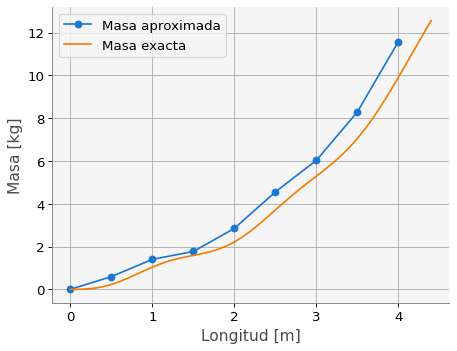

In [172]:
# Gráfica de la masa exacta y de la aproximada
plt.plot(secciones, masa, 'o-', label='Masa aproximada')
plt.plot(x, m, '-', label = 'Masa exacta')

plt.xlabel('Longitud [m]')
plt.ylabel('Masa [kg]')
plt.legend()
plt.grid()
plt.show()

In [173]:
#file_answer.to_file("1")